<a href="https://colab.research.google.com/github/bcdmodelos/qualificacao-modelscode/blob/main/Modelo-Compartimental/codigo_modelo_SIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SIS (Susceptível - Infectado - Recuperado)

In [1]:
import pandas as pd
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!ls

drive  sample_data


In [4]:
%cd /content/drive/MyDrive/Notebooks_Doutorado/base-campina/

!ls

/content/drive/MyDrive/Notebooks_Doutorado/base-campina
dataset_Amazonas_usableData.csv
dataset_Bodocongo_usable.csv
dataset_Brasil_usableData.csv
dataset_CampinaGrande_casos_acumulados_usable.csv
dataset_CampinaGrande_casos_diarios_usable.csv
dataset_CampinaGrande_usableData.csv
dataset_Catole_usable.csv
dataset_Malvinas_usable.csv
dataset_Paraiba_usableData.csv
dataset_Pernambuco_usableData.csv


# Análise do Dados do Brasil

Calculo para Taxa de Infecção/Transmissão para o Brasil

In [5]:
file_path = "./dataset_Brasil_usableData.csv"
brasilDataSet = pd.read_csv(file_path, encoding='latin1')
brasilDataSet.head()

,Unnamed: 0,date,totalCases,deaths,suspects,recovered,tests,vaccinated,vaccinated_second,activeCases,newVaccinated,newVaccinated_second
0,293,2020-03-22,1594,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,321,2020-03-23,1952,34,15867.0,8.0,NaN,NaN,NaN,1910.0,NaN,NaN
2,349,2020-03-24,2255,47,17700.0,20.0,NaN,NaN,NaN,2188.0,NaN,NaN
3,377,2020-03-25,2566,59,27227.0,27.0,NaN,NaN,NaN,2480.0,NaN,NaN
4,405,2020-03-26,2990,77,50012.0,42.0,NaN,NaN,NaN,2871.0,NaN,NaN


In [6]:
# Explicação o calculo para extraí taxa de tramissão

# Taxa de transmissão comunitária de COVID-19 em 14 dias: 
# soma de todos os NOVOS casos de COVID-19 nos últimos 14 dias,
# dividido pela população e multiplicado por 100.000 = taxa de casos novos por 100.000 habitantes nos últimos 14 dias.

# taxaInfeccaoBrasil = ((totalCases[14] - totalCases[0]) / populacaoBrasil) * 100.000

In [12]:
populacaoBrasil = 212600000
#taxaInfeccaoBrasilCalculo = ((brasilDataSet.totalCases[14] - brasilDataSet.totalCases[0])/ populacaoBrasil) * 100000
taxaInfeccaoBrasilCalculo = 1.78
taxaInfeccaoBrasilCalculo

1.78

Modelo SIS para os Dados do Brasil

In [13]:
I0_Brasil = 1 # # Número Inicial de Indivíduos Infectados no Brasil

R0_Brasil = 0 # Número Inicial de Indivíduos Recuperados no Brasil

S0_Brasil = populacaoBrasil - I0_Brasil # S0 = Suscetíveis à infecção inicialmente

taxaInfeccaoBrasil = taxaInfeccaoBrasilCalculo # Taxa de contato/infecção (beta)

dias = 15
gama_Brasil = 1/dias # Taxa média de recuperação (gama) = 1/dias

tempo_Brasil = np.linspace(0, 40, 40)

In [26]:
def equacoesSISs(y_Brasil, tempo_Brasil, populacaoBrasil, taxaInfeccaoBrasil, gama_Brasil):
    S_Brasil, I_Brasil= y_Brasil
    dSdt_Brasil = -taxaInfeccaoBrasil * S_Brasil * I_Brasil / populacaoBrasil + gama_Brasil * I_Brasil
    dIdt_Brasil = taxaInfeccaoBrasil * S_Brasil * I_Brasil / populacaoBrasil - gama_Brasil * I_Brasil
    return dSdt_Brasil, dIdt_Brasil

# Vetor de condições iniciais
y0_Brasil = S0_Brasil, I0_Brasil 

# Integração das equações SIS no tempo
i = odeint(equacoesSISs, y0_Brasil, tempo_Brasil, args=(populacaoBrasil, taxaInfeccaoBrasil, gama_Brasil))
S_Brasil, I_Brasil = i.T

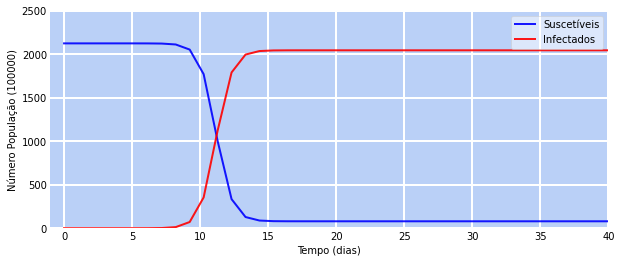

In [27]:
fig = plt.figure(figsize=(10, 4),facecolor='w')
ax = fig.add_subplot(111, facecolor='#bad0f7', axisbelow=True)
ax.plot(tempo_Brasil, S_Brasil/100000, 'b', alpha=0.9, lw=2, label='Suscetíveis')
ax.plot(tempo_Brasil, I_Brasil/100000, 'r', alpha=0.9, lw=2, label='Infectados')
ax.set_xlabel('Tempo (dias)')
ax.set_ylabel('Número População (100000)')
ax.set_ylim(0,4.2)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
plt.axis(xmin=-1, xmax=40, ymin=-1, ymax=2500)
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()

# Análise dos Dados da Paraíba

Modelo SIS para os Dados da Paraíba

In [28]:
populacaoParaiba = 4039277
# taxaInfeccaoParaibaCalculo = ((paraibaDataSet.totalCases[14] - paraibaDataSet.totalCases[0])/ populacaoParaiba) * 100000
taxaInfeccaoParaibaCalculo = 2.47
taxaInfeccaoParaibaCalculo

2.47

In [29]:
I0_Paraiba = 1 # # Número Inicial de Indivíduos Infectados no Paraiba

R0_Paraiba = 0 # Número Inicial de Indivíduos Recuperados no Paraiba

S0_Paraiba = populacaoParaiba - I0_Paraiba # S0 = Suscetíveis à infecção inicialmente

taxaInfeccaoParaiba = taxaInfeccaoParaibaCalculo # Taxa de contato/infecção (beta)

dias = 15
gama_Paraiba = 1/dias # Taxa média de recuperação (gama) = 1/dias

tempo_Paraiba = np.linspace(0, 40, 40)

In [30]:
def equacoesSISs(y_Paraiba, tempo_Paraiba, populacaoParaiba, taxaInfeccaoParaiba, gama_Paraiba):
    S_Paraiba, I_Paraiba= y_Paraiba
    dSdt_Paraiba = -taxaInfeccaoParaiba * S_Paraiba * I_Paraiba / populacaoParaiba + gama_Paraiba * I_Paraiba
    dIdt_Paraiba = taxaInfeccaoParaiba * S_Paraiba * I_Paraiba / populacaoParaiba - gama_Paraiba * I_Paraiba
    return dSdt_Paraiba, dIdt_Paraiba

# Vetor de condições iniciais
y0_Paraiba = S0_Paraiba, I0_Paraiba 

# Integração das equações SIS no tempo
i = odeint(equacoesSISs, y0_Paraiba, tempo_Paraiba, args=(populacaoParaiba, taxaInfeccaoParaiba, gama_Paraiba))
S_Paraiba, I_Paraiba = i.T

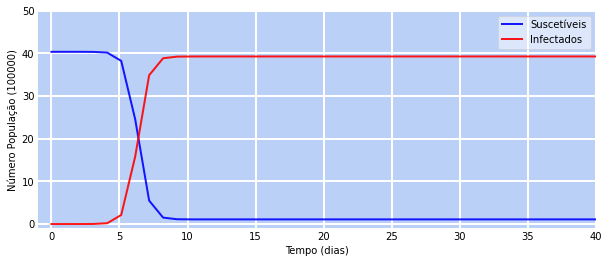

In [35]:
fig = plt.figure(figsize=(10, 4),facecolor='w')
ax = fig.add_subplot(111, facecolor='#bad0f7', axisbelow=True)
ax.plot(tempo_Paraiba, S_Paraiba/100000, 'b', alpha=0.9, lw=2, label='Suscetíveis')
ax.plot(tempo_Paraiba, I_Paraiba/100000, 'r', alpha=0.9, lw=2, label='Infectados')
ax.set_xlabel('Tempo (dias)')
ax.set_ylabel('Número População (100000)')
ax.set_ylim(0,4.2)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
plt.axis(xmin=-1, xmax=40, ymin=-1, ymax=50)
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()

# Análise dos Dados de Campina Grande 

Modelo SIS para os Dados de Campina Grande

In [36]:
populacaoCampinaGrande = 411807
# taxaInfeccaoCampinaGrandeCalculo = ((campinaGrandeDataSet.cum_casos[14] - campinaGrandeDataSet.cum_casos[0])/ populacaoCampinaGrande) * 100000
taxaInfeccaoCampinaGrandeCalculo = 2.47
taxaInfeccaoCampinaGrandeCalculo

2.47

In [37]:
I0_CampinaGrande = 1 # # Número Inicial de Indivíduos Infectados no CampinaGrande

R0_CampinaGrande = 0 # Número Inicial de Indivíduos Recuperados no CampinaGrande

S0_CampinaGrande = populacaoCampinaGrande - I0_CampinaGrande # S0 = Suscetíveis à infecção inicialmente

taxaInfeccaoCampinaGrande = taxaInfeccaoCampinaGrandeCalculo # Taxa de contato/infecção (beta)

dias = 15
gama_CampinaGrande = 1/dias # Taxa média de recuperação (gama) = 1/dias

tempo_CampinaGrande = np.linspace(0, 40, 40)

In [38]:
def equacoesSISs(y_CampinaGrande, tempo_CampinaGrande, populacaoCampinaGrande, taxaInfeccaoCampinaGrande, gama_CampinaGrande):
    S_CampinaGrande, I_CampinaGrande= y_CampinaGrande
    dSdt_CampinaGrande = -taxaInfeccaoCampinaGrande * S_CampinaGrande * I_CampinaGrande / populacaoCampinaGrande + gama_CampinaGrande * I_CampinaGrande
    dIdt_CampinaGrande = taxaInfeccaoCampinaGrande * S_CampinaGrande * I_CampinaGrande / populacaoCampinaGrande - gama_CampinaGrande * I_CampinaGrande
    return dSdt_CampinaGrande, dIdt_CampinaGrande

# Vetor de condições iniciais
y0_CampinaGrande = S0_CampinaGrande, I0_CampinaGrande 

# Integração das equações SIS no tempo
i = odeint(equacoesSISs, y0_CampinaGrande, tempo_CampinaGrande, args=(populacaoCampinaGrande, taxaInfeccaoCampinaGrande, gama_CampinaGrande))
S_CampinaGrande, I_CampinaGrande = i.T

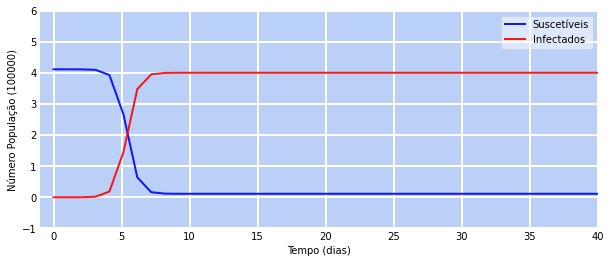

In [41]:
fig = plt.figure(figsize=(10, 4),facecolor='w')
ax = fig.add_subplot(111, facecolor='#bad0f7', axisbelow=True)
ax.plot(tempo_CampinaGrande, S_CampinaGrande/100000, 'b', alpha=0.9, lw=2, label='Suscetíveis')
ax.plot(tempo_CampinaGrande, I_CampinaGrande/100000, 'r', alpha=0.9, lw=2, label='Infectados')
ax.set_xlabel('Tempo (dias)')
ax.set_ylabel('Número População (100000)')
ax.set_ylim(0,4.2)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
plt.axis(xmin=-1, xmax=40, ymin=-1, ymax=6)
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()

#Análise dos Dados dos Bairros


Modelo SIS para os Dados do bairro de Bodocongó

In [42]:
populacaoBodocongo = 3938
# taxaInfeccaoBodocongoCalculo = ((BodocongoDataSet.cum_casos[14] - BodocongoDataSet.cum_casos[0])/ populacaoBodocongo) * 100000
taxaInfeccaoBodocongoCalculo = 2.47
taxaInfeccaoBodocongoCalculo

2.47

In [43]:
I0_Bodocongo = 1 # # Número Inicial de Indivíduos Infectados no Bodocongo

R0_Bodocongo = 0 # Número Inicial de Indivíduos Recuperados no Bodocongo

S0_Bodocongo = populacaoBodocongo - I0_Bodocongo # S0 = Suscetíveis à infecção inicialmente

taxaInfeccaoBodocongo = taxaInfeccaoBodocongoCalculo # Taxa de contato/infecção (beta)

dias = 15
gama_Bodocongo = 1/dias # Taxa média de recuperação (gama) = 1/dias

tempo_Bodocongo = np.linspace(0, 40, 40)

In [45]:
def equacoesSISs(y_Bodocongo, tempo_Bodocongo, populacaoBodocongo, taxaInfeccaoBodocongo, gama_Bodocongo):
    S_Bodocongo, I_Bodocongo= y_Bodocongo
    dSdt_Bodocongo = -taxaInfeccaoBodocongo * S_Bodocongo * I_Bodocongo / populacaoBodocongo + gama_Bodocongo * I_Bodocongo
    dIdt_Bodocongo = taxaInfeccaoBodocongo * S_Bodocongo * I_Bodocongo / populacaoBodocongo - gama_Bodocongo * I_Bodocongo
    return dSdt_Bodocongo, dIdt_Bodocongo

# Vetor de condições iniciais
y0_Bodocongo = S0_Bodocongo, I0_Bodocongo 

# Integração das equações SIS no tempo
i = odeint(equacoesSISs, y0_Bodocongo, tempo_Bodocongo, args=(populacaoBodocongo, taxaInfeccaoBodocongo, gama_Bodocongo))
S_Bodocongo, I_Bodocongo = i.T

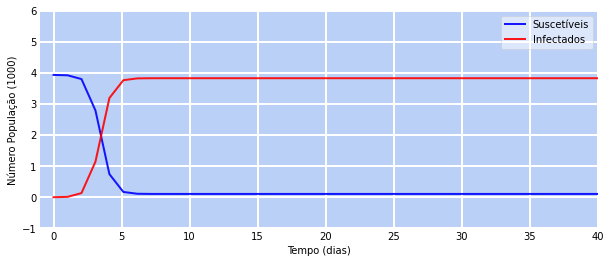

In [54]:
fig = plt.figure(figsize=(10, 4),facecolor='w')
ax = fig.add_subplot(111, facecolor='#bad0f7', axisbelow=True)
ax.plot(tempo_Bodocongo, S_Bodocongo/1000, 'b', alpha=0.9, lw=2, label='Suscetíveis')
ax.plot(tempo_Bodocongo, I_Bodocongo/1000, 'r', alpha=0.9, lw=2, label='Infectados')
ax.set_xlabel('Tempo (dias)')
ax.set_ylabel('Número População (1000)')
ax.set_ylim(0,4.2)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
plt.axis(xmin=-1, xmax=40, ymin=-1, ymax=6)
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()

Modelo SIS para os Dados do bairro do Catolé

In [55]:
populacaoCatole = 5896
# taxaInfeccaoCatoleCalculo = ((CatoleDataSet.cum_casos[14] - CatoleDataSet.cum_casos[0])/ populacaoCatole) * 100000
taxaInfeccaoCatoleCalculo = 2.47
taxaInfeccaoCatoleCalculo

2.47

In [56]:
I0_Catole = 1 # # Número Inicial de Indivíduos Infectados no Catole

R0_Catole = 0 # Número Inicial de Indivíduos Recuperados no Catole

S0_Catole = populacaoCatole - I0_Catole # S0 = Suscetíveis à infecção inicialmente

taxaInfeccaoCatole = taxaInfeccaoCatoleCalculo # Taxa de contato/infecção (beta)

dias = 15
gama_Catole = 1/dias # Taxa média de recuperação (gama) = 1/dias

tempo_Catole = np.linspace(0, 40, 40)

In [57]:
def equacoesSISs(y_Catole, tempo_Catole, populacaoCatole, taxaInfeccaoCatole, gama_Catole):
    S_Catole, I_Catole= y_Catole
    dSdt_Catole = -taxaInfeccaoCatole * S_Catole * I_Catole / populacaoCatole + gama_Catole * I_Catole
    dIdt_Catole = taxaInfeccaoCatole * S_Catole * I_Catole / populacaoCatole - gama_Catole * I_Catole
    return dSdt_Catole, dIdt_Catole

# Vetor de condições iniciais
y0_Catole = S0_Catole, I0_Catole 

# Integração das equações SIS no tempo
i = odeint(equacoesSISs, y0_Catole, tempo_Catole, args=(populacaoCatole, taxaInfeccaoCatole, gama_Catole))
S_Catole, I_Catole = i.T

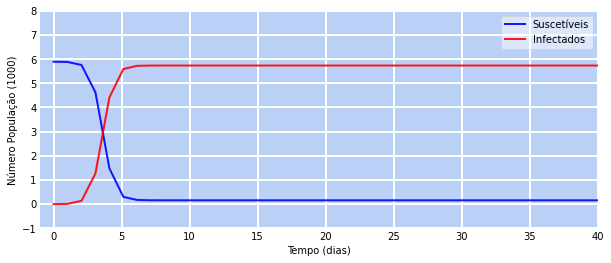

In [59]:
fig = plt.figure(figsize=(10, 4),facecolor='w')
ax = fig.add_subplot(111, facecolor='#bad0f7', axisbelow=True)
ax.plot(tempo_Catole, S_Catole/1000, 'b', alpha=0.9, lw=2, label='Suscetíveis')
ax.plot(tempo_Catole, I_Catole/1000, 'r', alpha=0.9, lw=2, label='Infectados')
ax.set_xlabel('Tempo (dias)')
ax.set_ylabel('Número População (1000)')
ax.set_ylim(0,4.2)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
plt.axis(xmin=-1, xmax=40, ymin=-1, ymax=8)
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()

Modelo SIS para os Dados do bairro das Malvinas

In [60]:
populacaoMalvinas = 10909
# taxaInfeccaoMalvinasCalculo = ((MalvinasDataSet.cum_casos[14] - MalvinasDataSet.cum_casos[0])/ populacaoMalvinas) * 100000
taxaInfeccaoMalvinasCalculo = 2.47
taxaInfeccaoMalvinasCalculo

2.47

In [61]:
I0_Malvinas = 1 # # Número Inicial de Indivíduos Infectados no Malvinas

R0_Malvinas = 0 # Número Inicial de Indivíduos Recuperados no Malvinas

S0_Malvinas = populacaoMalvinas - I0_Malvinas # S0 = Suscetíveis à infecção inicialmente

taxaInfeccaoMalvinas = taxaInfeccaoMalvinasCalculo # Taxa de contato/infecção (beta)

dias = 15
gama_Malvinas = 1/dias # Taxa média de recuperação (gama) = 1/dias

tempo_Malvinas = np.linspace(0, 40, 40)

In [62]:
def equacoesSISs(y_Malvinas, tempo_Malvinas, populacaoMalvinas, taxaInfeccaoMalvinas, gama_Malvinas):
    S_Malvinas, I_Malvinas= y_Malvinas
    dSdt_Malvinas = -taxaInfeccaoMalvinas * S_Malvinas * I_Malvinas / populacaoMalvinas + gama_Malvinas * I_Malvinas
    dIdt_Malvinas = taxaInfeccaoMalvinas * S_Malvinas * I_Malvinas / populacaoMalvinas - gama_Malvinas * I_Malvinas
    return dSdt_Malvinas, dIdt_Malvinas

# Vetor de condições iniciais
y0_Malvinas = S0_Malvinas, I0_Malvinas 

# Integração das equações SIS no tempo
i = odeint(equacoesSISs, y0_Malvinas, tempo_Malvinas, args=(populacaoMalvinas, taxaInfeccaoMalvinas, gama_Malvinas))
S_Malvinas, I_Malvinas = i.T

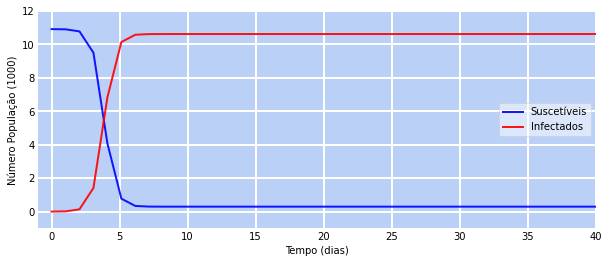

In [64]:
fig = plt.figure(figsize=(10, 4),facecolor='w')
ax = fig.add_subplot(111, facecolor='#bad0f7', axisbelow=True)
ax.plot(tempo_Malvinas, S_Malvinas/1000, 'b', alpha=0.9, lw=2, label='Suscetíveis')
ax.plot(tempo_Malvinas, I_Malvinas/1000, 'r', alpha=0.9, lw=2, label='Infectados')
ax.set_xlabel('Tempo (dias)')
ax.set_ylabel('Número População (1000)')
ax.set_ylim(0,4.2)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
plt.axis(xmin=-1, xmax=40, ymin=-1, ymax=12)
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()